# Human Activity Recognition

Data source: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

# Quick overview of the dataset :

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
train = pd.read_csv('./human-activity-recognition-with-smartphones/train.csv')
test = pd.read_csv('./human-activity-recognition-with-smartphones/test.csv')

In [3]:
# print first 2 rows of train data
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [4]:
# print first 2 rows of test data
test.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING


In [5]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


# Data Cleaning

### 1. Changing feature names

We always need to special characters from column names.

In [6]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

### 2. Check for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


There are no duplicate rows.

### 3. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


There are no null values.

### 4. Check for data imbalance

### i) Check number of activites per subject / person.

In [9]:
# import required liabraries for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

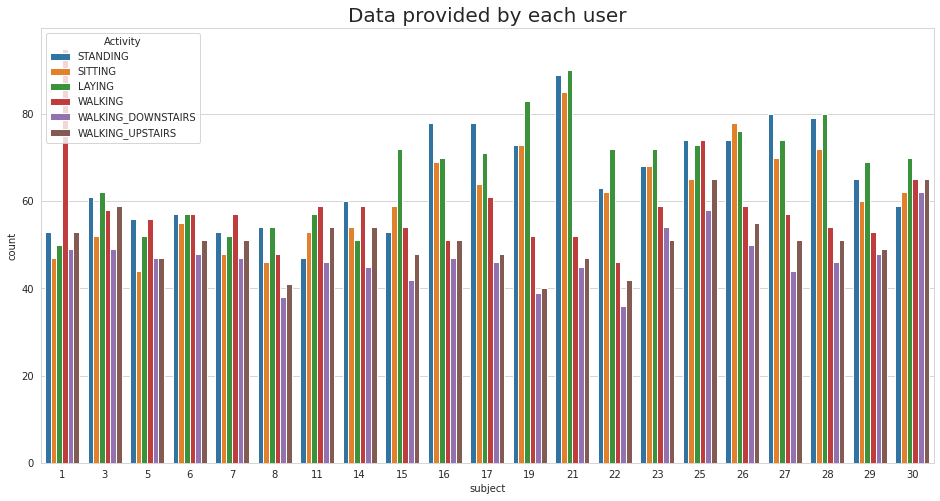

In [10]:
plt.figure(figsize=(16,8)) # set fig size
plt.title('Data provided by each user', fontsize=20) # give title
sns.countplot(x='subject',hue='Activity', data = train) # count plot gives count of each activities per subject
plt.show()

### Observations:

1. Each activities are almost same for all volunteers. 

### ii) Check number of data points per class

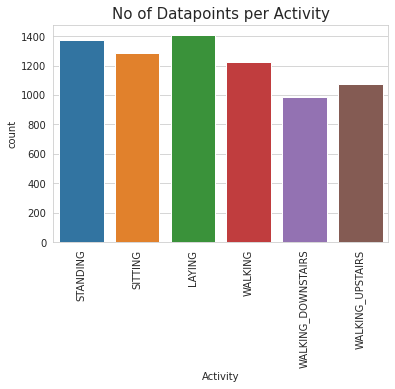

In [11]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity) # count plot gives count of each activity
plt.xticks(rotation=90)
plt.show()

### Observation:
All activities is almost balanced.

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be useful.

### 2. Stationary and Moving activities are completely different

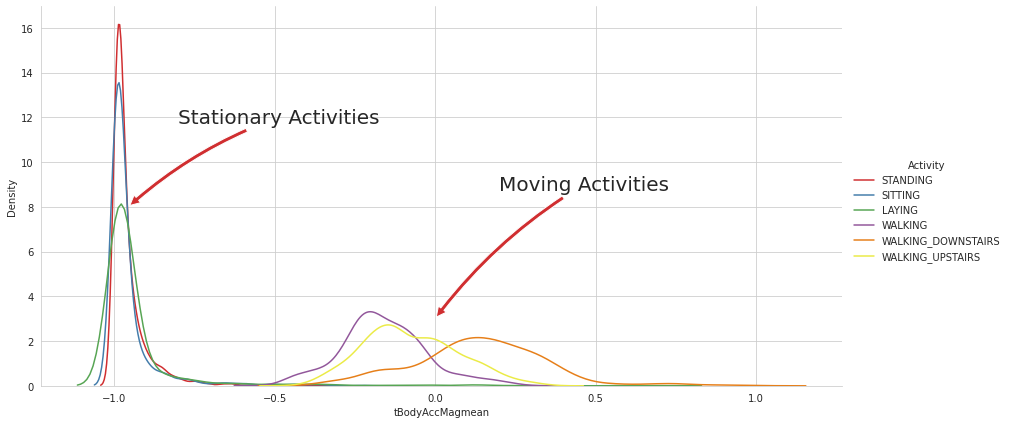

In [12]:
sns.set_palette("Set1", desat=0.80) # Set the matplotlib color cycle using a seaborn palette.
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2) # plot smooth histogram
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,8), xytext=(-0.8, 12), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1")) # title

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1")) # title
plt.show()

### Observation:
From above plot we can see that for dynamic activites 'tBodyAccMagmean' features value is more than -0.5. So that we can easily distinguish stationary activities and moving activities.

In [13]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [14]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']=='WALKING']
df2 = train[train['Activity']=='WALKING_UPSTAIRS']
df3 = train[train['Activity']=='WALKING_DOWNSTAIRS']
df4 = train[train['Activity']=='SITTING']
df5 = train[train['Activity']=='STANDING']
df6 = train[train['Activity']=='LAYING']

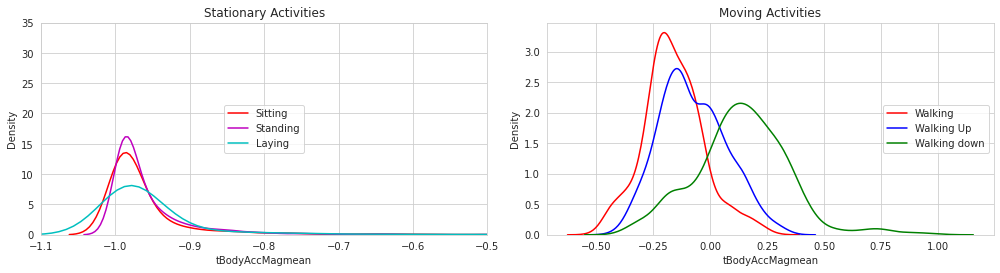

In [15]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1) # plot subplots
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying') # plot all stationary activities
plt.axis([-1.1, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down') # plot all moving activities
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

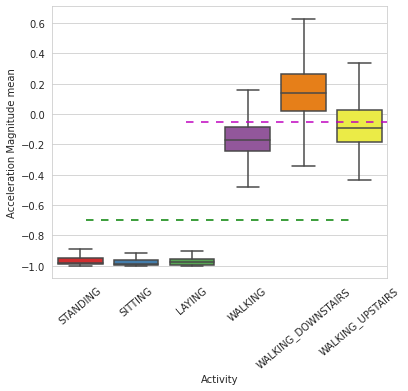

In [16]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=40)
plt.show()

### Observations:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters

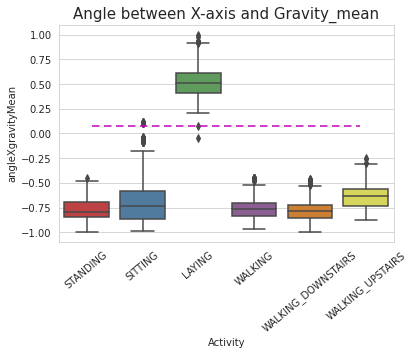

In [17]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### Observations:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

# Dimensionality Reduction

- We have total 564 features, we could not able to analyze all the features through EDA. 

- By applying dimensionality reduction technique we can analyze all the features.

- Let's see can we able to differentiate activities after applying dimensionality reduction technique.

## Apply T-SNE on the data

- T - SNE is used for dimensionality reduction. Here we are converting 564 dimensions into 2 dimensions. So that we can easily analyze the data.

In [18]:
from sklearn.manifold import TSNE

In [19]:
# performs t-sne with different perplexity values and their repective plots..
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        plt.show()
        print('Done')


- We have added subject column for EDA only, it will not be useful for tsne, drop it.
- we are applying tsne on activity. Use activity as a y label. 


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 1.600s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.028s
[t-SNE] Iteration 50: error = 124.8340302, gradient norm = 0.0258954 (50 iterations in 2.167s)
[t-SNE] Iteration 100: error = 106.8947067, gradient norm = 0.0295072 (50 iterations in 

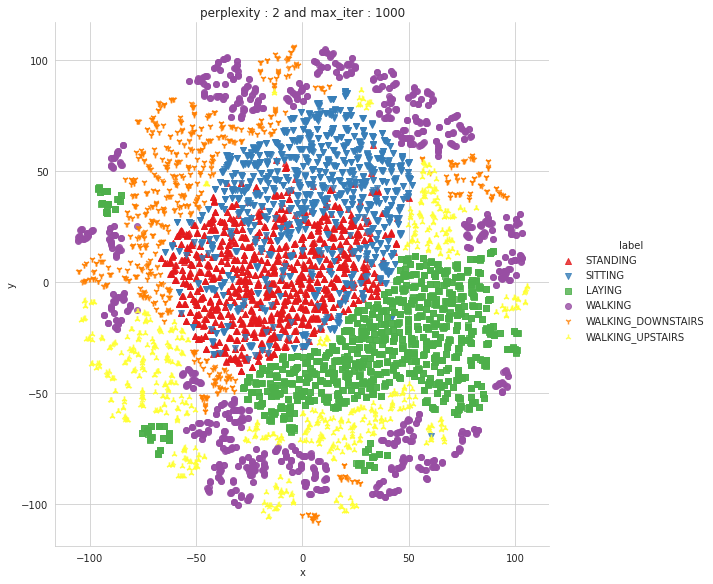

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 1.525s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 114.0087051, gradient norm = 0.0230995 (50 iterations in 2.210s)
[t-SNE] Iteration 100: error = 97.3793640, gradient norm = 0.0162768 (50 iteration

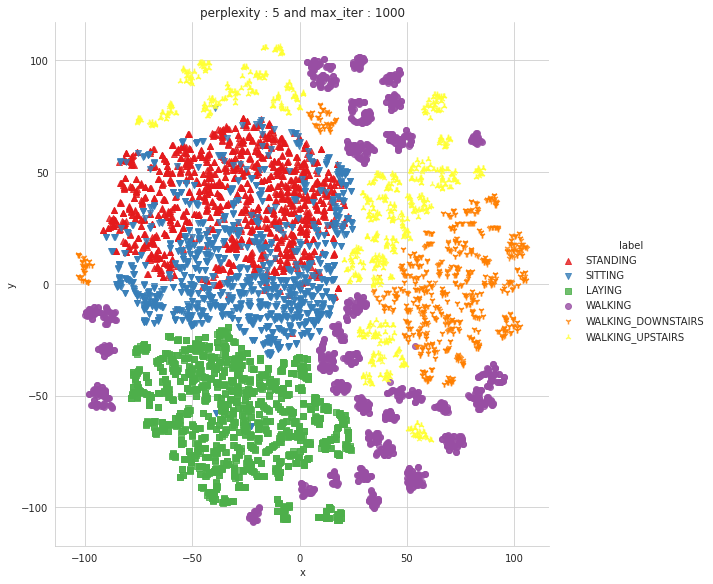

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.086s
[t-SNE] Iteration 50: error = 106.2433243, gradient norm = 0.0106662 (50 iterations in 2.529s)
[t-SNE] Iteration 100: error = 90.8924103, gradient norm = 0.0103311 (50 iteratio

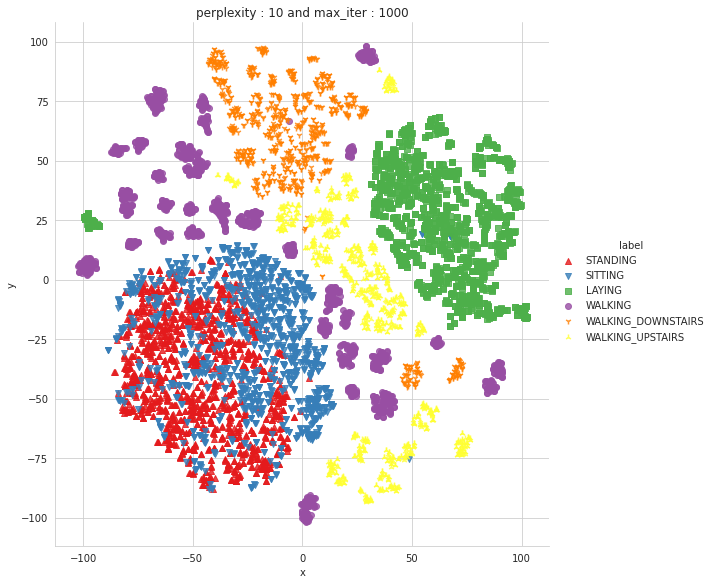

Done


In [20]:
X_pre_tsne = train.drop(['subject','Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10])

### Observations:
- From above plot we can clearly distinguish all the activities, excluding standing and sitting. These two activities are overlapping with each other.
- After building a model may be it will be difficult for model to distinguish these 2 classes.
- Le't check...

# Make data model ready

In [21]:
# get X_test and y_test from train csv file
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

In [22]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [23]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Model Building

### Creating a function to run any specified model

In [24]:
# This function will return accuracy, normalized confusion matrix, precision, recall, and f1-score.
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

### Function to print the gridsearch Attributes

In [25]:
# This fuction returns best parameters after applying gridsearch
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


### Function to plot the confusion matrix

In [26]:
# Labels that are useful in plotting confusion matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [27]:
import itertools
from sklearn.metrics import confusion_matrix

# This fuction print confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1. Logistic Regression with Grid Search

In [28]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:18.201319


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.023382


---------------------
|      Accuracy      |
---------------------

    0.9592806243637597


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 406  10]
 [  0   0   0  24   1 446]]


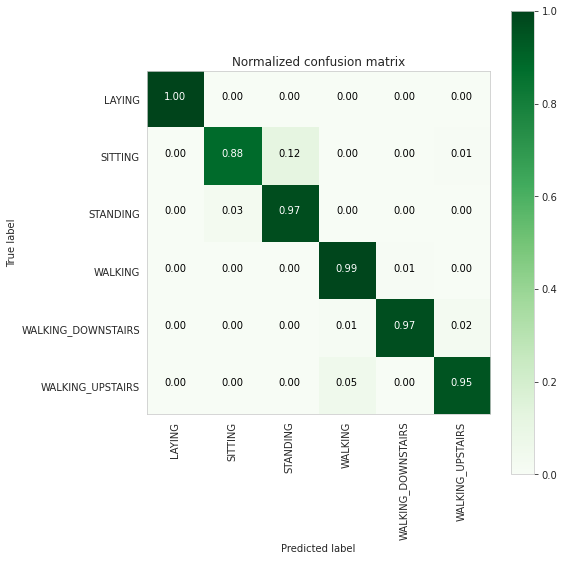

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [29]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

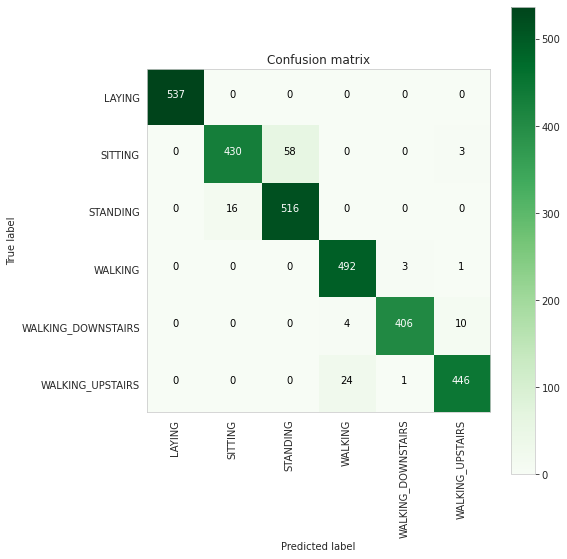

In [30]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [31]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9378415584920218



### Observations:
- We got 93.78% test accuracy.
- From confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

## 2. Linear SVC with GridSearch

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:01:37.183601


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013506


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


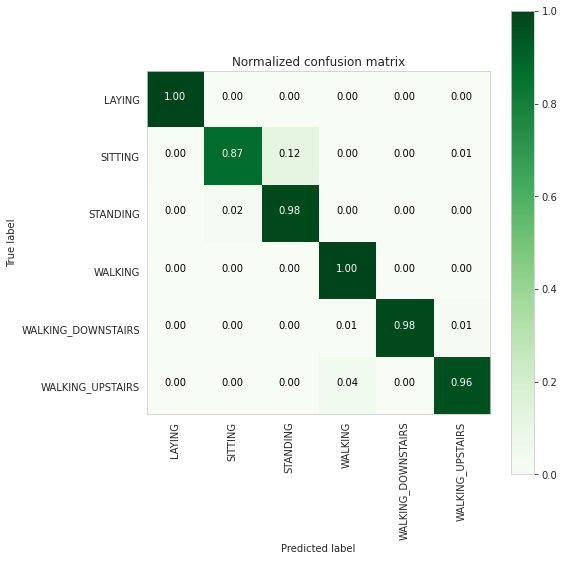

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [32]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005,max_iter=2000)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

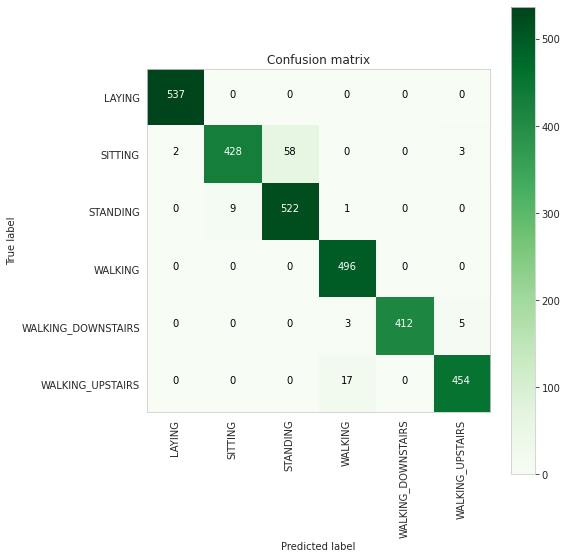

In [33]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [34]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, max_iter=2000, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9422003634900594



### Observations:
- We got 94.23% test accuracy.
- Here also in confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

## 3. Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:05:02.412946


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.026760


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


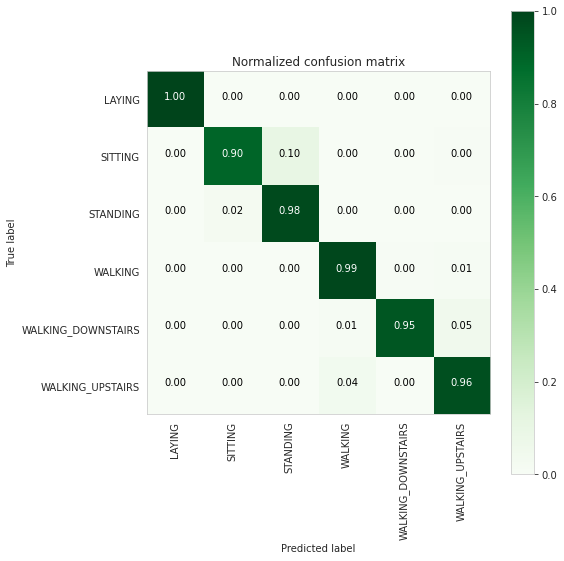

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [35]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

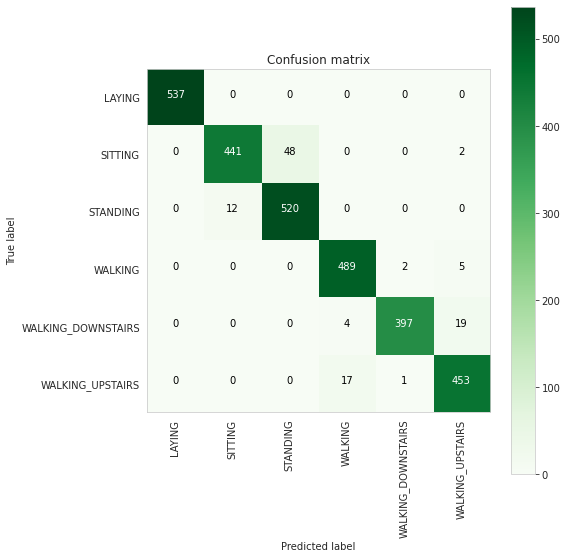

In [36]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [37]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



### Observations:
- We got 94.47% test accuracy.
- Here also in confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

### Let's check tree based models can overcome this problem

## 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:19.107843


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010336


---------------------
|      Accuracy      |
---------------------

    0.8727519511367492


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 373 118   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 468  21   7]
 [  0   0   0  27 347  46]
 [  0   0   0  55  42 374]]


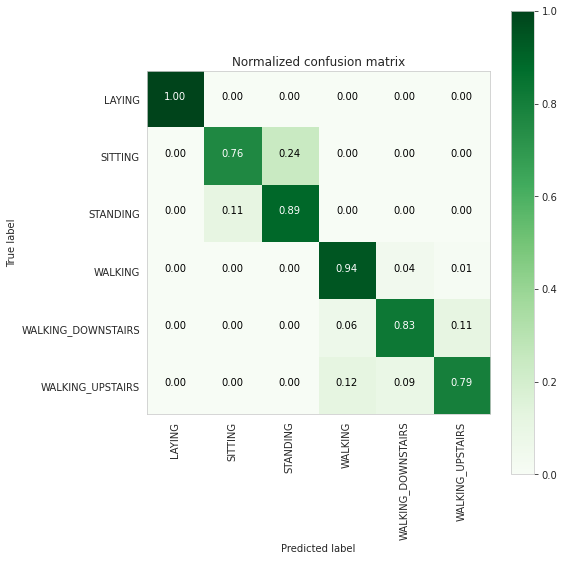

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.85      0.94      0.89       496
WALKING_DOWNSTAIRS       0.85      0.83      0.84       420
  WALKING_UPSTAIRS       0.88      0.79      0.83       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947



In [38]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

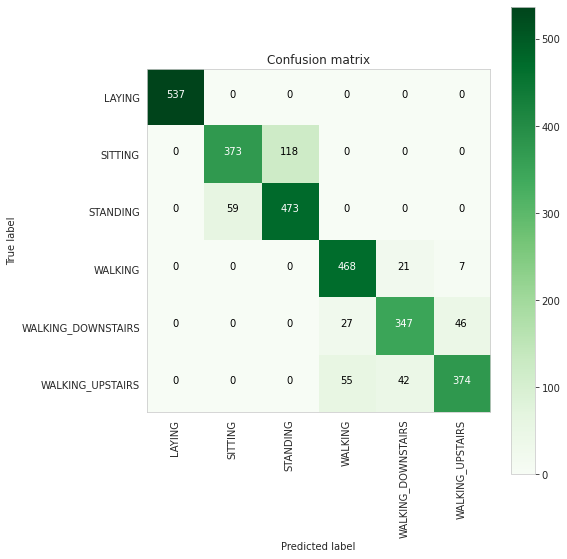

In [39]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [40]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8514791640653542



### Observations:
- Got 84.99% accuracy. Accuracy is decreased.

## 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:12:18.240585


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.097448


---------------------
|      Accuracy      |
---------------------

    0.9212758737699356


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  62   0   0   0]
 [  0  42 490   0   0   0]
 [  0   0   0 478   6  12]
 [  0   0   0  19 356  45]
 [  0   0   0  39   7 425]]


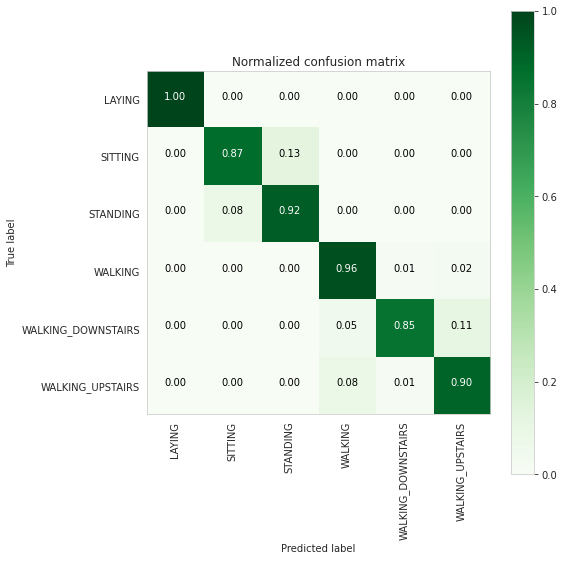

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.87      0.89       491
          STANDING       0.89      0.92      0.90       532
           WALKING       0.89      0.96      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.88      0.90      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [41]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

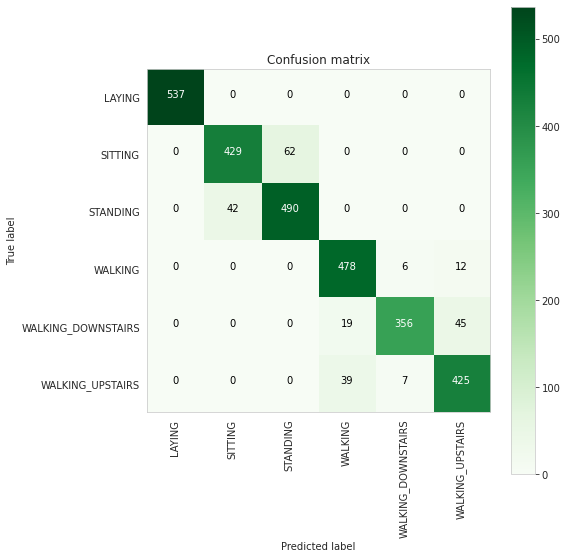

In [42]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [43]:
print_grid_search_attributes(rfc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=130)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 130}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9211140554114235



## 6. Gradient Boosted Decision Trees With GridSearch

training the model..


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Done 
 

training_time(HH:MM:SS.ms) - 3:19:52.358740


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.059764


---------------------
|      Accuracy      |
---------------------

    0.9440108585001696


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 436  53   0   0   2]
 [  0  33 499   0   0   0]
 [  0   0   0 486   1   9]
 [  0   0   1   9 383  27]
 [  0   0   1  24   5 441]]


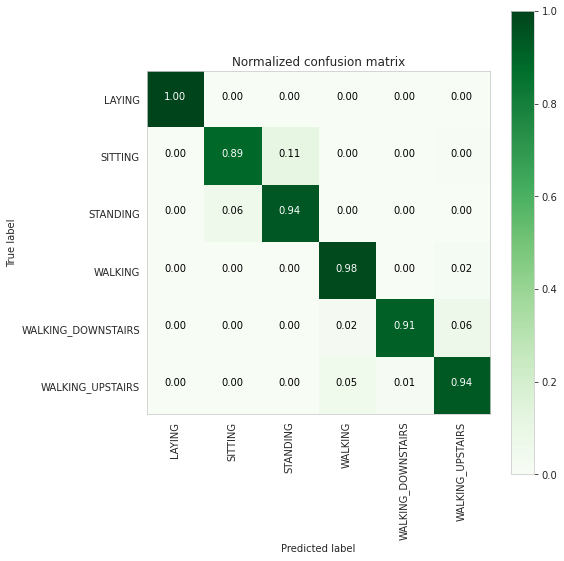

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.89      0.91       491
          STANDING       0.90      0.94      0.92       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.98      0.91      0.95       420
  WALKING_UPSTAIRS       0.92      0.94      0.93       471

          accuracy                           0.94      2947
         macro avg       0.95      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': [1,2,3],
             'n_estimators':[100,150,200]}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

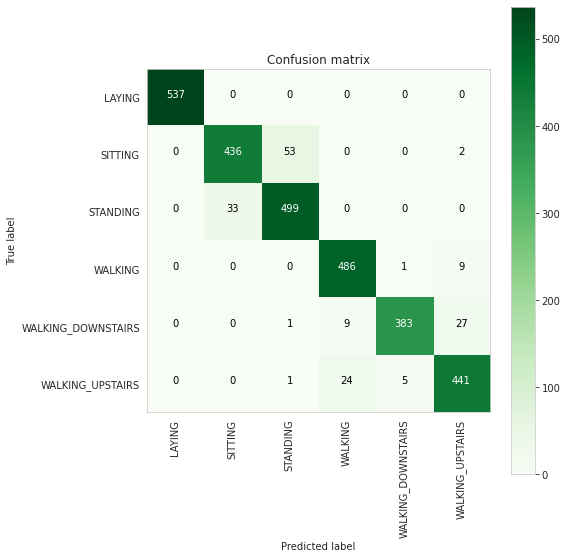

In [45]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [46]:
print_grid_search_attributes(gbdt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(max_depth=2, n_estimators=200)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 2, 'n_estimators': 200}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9264180505648895



## 7. Deep learning model

In [47]:
# import required liabraries for Nueral Network
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

In [48]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'activities'.
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)
 
print(y_train1)
print(y_test1)

[2 2 2 ... 5 5 5]
[2 2 2 ... 5 5 5]


In [49]:
# here we are having a categorical classes for each activity
print("Class label of first activity :", y_train[0])

# lets convert this into a 6 dimensional vector
# ex: consider a activity is "standing" convert it into 2 => [0, 0, 1, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train1, 6) 
Y_test = utils.to_categorical(y_test1, 6)

print("After converting the output into a vector : ",Y_train[0])

Class label of first activity : STANDING
After converting the output into a vector :  [0. 0. 1. 0. 0. 0.]


In [50]:
# some model parameters

output_dim = 6
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 50

In [51]:
# start building a model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(12, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(Dense(output_dim, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                35968     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
Total params: 36,826
Trainable params: 36,826
Non-trainable params: 0
_________________________________________________________________
None


2022-10-01 12:48:48.508999: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [52]:
# Before training a model, we need to configure the learning process, which is done via the compile method
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, we will typically use the  fit function
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)

2022-10-01 12:48:49.034185: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
58/58 [==============================] - 1s 4ms/step - loss: 1.1482 - accuracy: 0.5921
Epoch 2/50
58/58 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8921
Epoch 3/50
58/58 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9240
Epoch 4/50
58/58 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9392
Epoch 5/50
58/58 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9502
Epoch 6/50
58/58 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9634
Epoch 7/50
58/58 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9612
Epoch 8/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.9678
Epoch 9/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.9686
Epoch 10/50
58/58 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9727
Epoch 11/50
58/58 [

In [54]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.18972808122634888
Test accuracy: 0.947404146194458


#### Note: We are not doing hypertunning on Nueral Network model.

There might be chance that accuracy of Deep learning model would be slightly increase after hyprtunning.

# Comparing all models

In [55]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))
print('Deep Learning       : {:.04}%      {:.04}% '.format(score[1] * 100,\
                                                        100-(score[1] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.93%      4.072%
Linear SVC          : 96.67%      3.325% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 87.28%      12.72% 
Random Forest       : 92.13%      7.872% 
GradientBoosting DT : 92.13%      7.872% 
Deep Learning       : 94.74%      5.26% 


# Conclusion:
- After comparing all the models Linear svc achieved highest accuracy.